# Estimating Coma Continuum

<IPython.core.display.Javascript object>


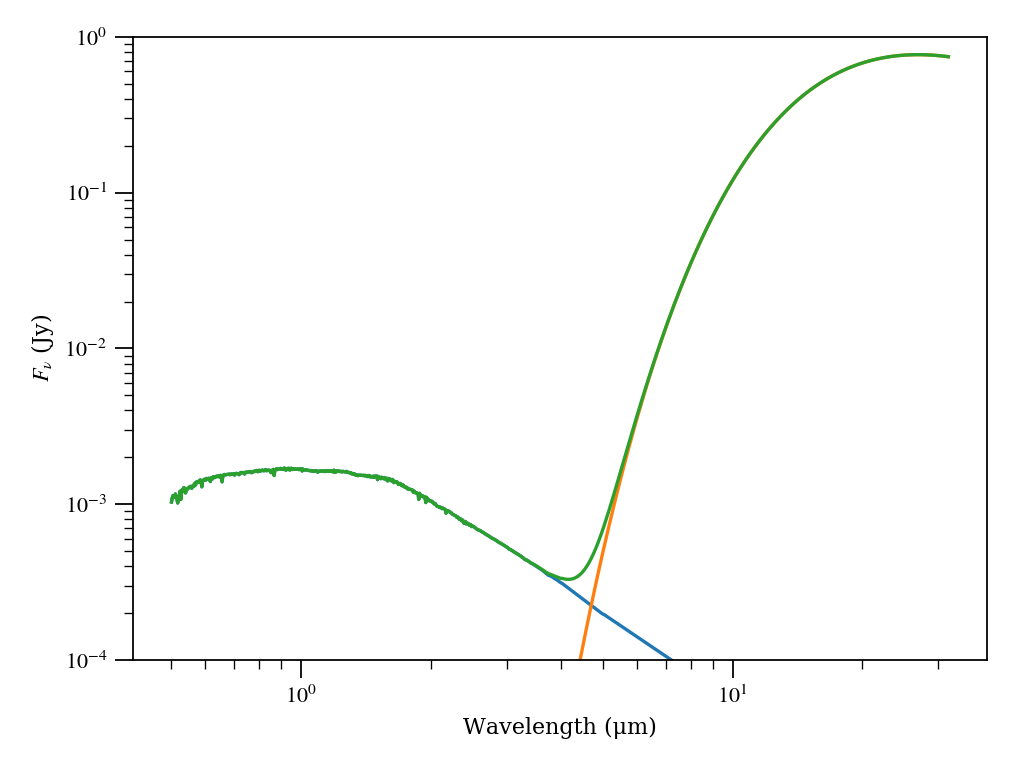

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from sbpy.activity import Afrho, Efrho
from mskpy.calib import solar_flux
% matplotlib notebook

afrho = Afrho(5000 * u.cm)
efrho = Efrho(afrho * 3.5)

# eph = Ephem.from_horizons(...)
eph = {'rh': 2.6 * u.au, 'delta': 3.0 * u.au, 'phase': 54 * u.deg}

wave = np.logspace(-0.3, 1.5, 1000) * u.um
nu = const.c / wave
aper = 1 * u.arcsec

S = solar_flux(wave, unit='Jy', smooth=False)

fsca = afrho.fluxd(nu, aper, eph, phasecor=True, S=S)
fth = efrho.fluxd(nu, aper, eph)

plt.clf()
plt.plot(wave, fsca, label='Scattered')
plt.plot(wave, fth, label='Thermal')
plt.plot(wave, (fsca + fth), label='Total')
plt.setp(plt.gca(), xlabel='Wavelength (μm)', ylabel='$F_ν$ (Jy)', xscale='log', yscale='log', ylim=[1e-4, 1])
plt.tight_layout()
plt.draw()